In [13]:
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

def tfg_eval(sess, df, x, x_vals):
    assert len(x)==len(x_vals), "must have the same number of values and variables"

    x_vals = x_vals.reshape(-1,1)

    result = np.array(sess.run(df, feed_dict={x:y[0] for x, y in zip(x,x_vals)}))
    return result

def py_rosenbrock(x):
    return sum((x[1:]-x[:-1]**2.0)**2.0 + (1-x[:-1])**2.0)

def plot_contour(f, x_points=None, y_points=None,  x_range=np.arange(-2, 2, .1), y_range=np.arange(-2, 2, .1),):
    X, Y = np.meshgrid(x_range, y_range)
    print ("Mesh size", X.shape)
    Z = np.array([[f(np.array([X[i,j], Y[i,j]])) for j in range(len(X[i]))] for i in range(len(X))])
    CS = plt.contourf(X, Y, Z, 20, cmap=plt.cm.hot)
    if x_points is not None:
        plt.scatter(x_points, y_points, c="white")
    return X, Y, Z


def get_df(N):

    tf.reset_default_graph()
    
    x = [tf.Variable(initial_value= 0.0, name= "x", dtype = tf.float32) for i in range(N)]
    f = tf.reduce_sum([tf.pow(x[i]-tf.pow(x[i-1],2.0),2.0)+tf.pow((1-x[i-1]),2.0) for i in range(1,len(x))])

    df = tf.gradients(f,x)

    return x, f, df

## Convolución 
La convolución es una operación básica en el tratamiento de imágenes. La figura siguiente lo ilustra. Dada una máscara (de tamaño 3x3 en este caso) se va deslizando por las distintas posiciones de la imagen. En cada paso, se multipica cada elemento de la máscara con los valores de los pixeles con los que corresonde en la imagen y, finalmente, se suman los valores obtenidos (nueve valores en este caso).
Dependiendo del valor de la máscara obtendremos distintos efectos y propiedades (_features_) de la imagen.

In [5]:
import numpy as np

def convolution(A, f):
    cols = A.shape[1]-f.shape[1]+1
    rows = A.shape[0]-f.shape[0]+1
 
    if cols<=0 or rows<=0:
        raise ValueError("filter must be smaller than matrix")

    result = np.zeros((cols,rows))

    for i in range(rows):
        for j in range(cols):
            result[i,j]=sum(sum(A[i:i+f.shape[0],j:j+f.shape[1]]*f))
    return result

In [11]:
A = np.array([[1,2,1,2,1,2],
              [2,3,2,3,2,3],
              [4,3,4,3,4,3],
              [6,4,6,4,6,4],
              [7,5,7,5,7,5]])
f = np.array([[2,2,2],
              [2,2,2]])
res = convolution(A,f)
print(res)

[[22. 26. 22. 26.]
 [36. 36. 36. 36.]
 [54. 48. 54. 48.]
 [70. 62. 70. 62.]]


In [12]:
from scipy.signal import convolve2d
res = convolve2d(A, f, mode="valid")
print(res)

[[22 26 22 26]
 [36 36 36 36]
 [54 48 54 48]
 [70 62 70 62]]


# Gradiente descendiente en TensorFlow


In [14]:
def gd(N=2, x_init=None, step_size=0.1, max_steps=300, min_delta=1e-4):
    plot = N==2
    x, f, df = get_df(N)

    r = np.array(x_init).astype(np.float) if x_init is not None else np.random.random(size=N)*3-1.5
    r_list = [r.copy()]

    if plot:
        plot_contour(py_rosenbrock, x_points=[1], y_points=[1])
    with tf.Session() as sess:

        for i in range(max_steps):

            gradient = tfg_eval(sess, df, x,r)
            delta    = gradient*step_size

            if np.linalg.norm(delta)<min_delta:
                break

            if plot:
                plt.arrow(r[0], r[1], -delta[0], -delta[1], head_width=0.05, head_length=0.1, fc='white', ec='white')

            r -= delta
            r_list += [r.copy()]
    return r

Mesh size (40, 40)


array([0.99890475, 0.99735676])

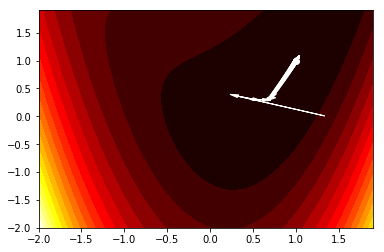

In [15]:
gd()